In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.cloud import bigquery
from google.oauth2 import service_account

In [3]:
key_path = '../service_account/gentle-keyword-423715-j0-03be08ad6412.json'

credentials = service_account.Credentials.from_service_account_file(
    key_path,
    scopes=["https://www.googleapis.com/auth/bigquery"]
)

In [4]:
from google.cloud import bigquery

client = bigquery.Client(
    credentials = credentials,
    project=credentials.project_id
)

In [5]:
idx_prod = 0

In [6]:
# Try if this connected

query = """
SELECT *
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20160801`
LIMIT 5
"""

df = client.query(query).to_dataframe()
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   visitorId             0 non-null      Int64 
 1   visitNumber           5 non-null      Int64 
 2   visitId               5 non-null      Int64 
 3   visitStartTime        5 non-null      Int64 
 4   date                  5 non-null      object
 5   totals                5 non-null      object
 6   trafficSource         5 non-null      object
 7   device                5 non-null      object
 8   geoNetwork            5 non-null      object
 9   customDimensions      5 non-null      object
 10  hits                  5 non-null      object
 11  fullVisitorId         5 non-null      object
 12  userId                0 non-null      object
 13  channelGrouping       5 non-null      object
 14  socialEngagementType  5 non-null      object
dtypes: Int64(4), object(11)
memory usage: 752.0+

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,channelGrouping,socialEngagementType
0,<NA>,1,1470046245,1470046245,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Firefox', 'browserVersion': 'not ...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",895954260133011192,None,Organic Search,Not Socially Engaged
1,<NA>,1,1470084717,1470084717,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 18, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Internet Explorer', 'browserVersi...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 13, 'minu...",0288478011259077136,None,Direct,Not Socially Engaged
2,<NA>,3,1470078988,1470078988,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",6440789996634275026,None,Organic Search,Not Socially Engaged
3,<NA>,4,1470075581,1470075581,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 19, 'ti...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 11, 'minu...",8520115029387302083,None,Referral,Not Socially Engaged
4,<NA>,30,1470099026,1470099026,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 17, 'minu...",6792260745822342947,None,Organic Search,Not Socially Engaged


In [7]:
# Create dataset reference
dataset_ref = client.dataset('google_analytics_sample', project='bigquery-public-data')
# Retrieve dataset from reference
dataset = client.get_dataset(dataset_ref)

In [8]:
# Get format schema nested field

def format_schema_field(schema_field, indent=0):
    indent_str = "  " * indent
    field_info = f"{indent_str}{schema_field.name} ({schema_field.field_type})"
    
    if schema_field.mode != "NULLABLE":
        field_info += f" - {schema_field.mode}"
    
    if schema_field.description:
        field_info += f" - {schema_field.description}"
    
    nested_indent = indent + 2
    if schema_field.field_type == "RECORD":
        for sub_field in schema_field.fields:
            field_info += "\n" + format_schema_field(sub_field, nested_indent)
    
    return field_info


table_ref = dataset_ref.table('ga_sessions_20160801')
table = client.get_table(table_ref)

# Display schemas
print("SCHEMA field for the 'totals' column:\n")
print(format_schema_field(table.schema[5]))
print()

print("\nSCHEMA field for the 'trafficSource' column:\n")
print(format_schema_field(table.schema[6]))
print()

print("\nSCHEMA field for the 'device' column:\n")
print(format_schema_field(table.schema[7]))
print()

print("\nSCHEMA field for the 'geoNetwork' column:\n")
print(format_schema_field(table.schema[8]))
print()

print("\nSCHEMA field for the 'customDimensions' column:\n")
print(format_schema_field(table.schema[9]))
print()

print("\nSCHEMA field for the 'hits' column:\n")
print(format_schema_field(table.schema[10]))

SCHEMA field for the 'totals' column:

totals (RECORD)
    visits (INTEGER)
    hits (INTEGER)
    pageviews (INTEGER)
    timeOnSite (INTEGER)
    bounces (INTEGER)
    transactions (INTEGER)
    transactionRevenue (INTEGER)
    newVisits (INTEGER)
    screenviews (INTEGER)
    uniqueScreenviews (INTEGER)
    timeOnScreen (INTEGER)
    totalTransactionRevenue (INTEGER)
    sessionQualityDim (INTEGER)


SCHEMA field for the 'trafficSource' column:

trafficSource (RECORD)
    referralPath (STRING)
    campaign (STRING)
    source (STRING)
    medium (STRING)
    keyword (STRING)
    adContent (STRING)
    adwordsClickInfo (RECORD)
        campaignId (INTEGER)
        adGroupId (INTEGER)
        creativeId (INTEGER)
        criteriaId (INTEGER)
        page (INTEGER)
        slot (STRING)
        criteriaParameters (STRING)
        gclId (STRING)
        customerId (INTEGER)
        adNetworkType (STRING)
        targetingCriteria (RECORD)
            boomUserlistId (INTEGER)
        isV

In [9]:
anomaly = pd.read_csv("../result/anomaly_products(1).csv")['product'].values
tuple(anomaly)

('Google Sunglasses',
 "Google Men's Vintage Badge Tee Black",
 "Google Men's 100% Cotton Short Sleeve Hero Tee White",
 'Google 22 oz Water Bottle',
 'Google Laptop and Cell Phone Stickers',
 'Red Shine 15 oz Mug',
 'Recycled Paper Journal Set',
 "Google Men's 100% Cotton Short Sleeve Hero Tee Black",
 'Google Twill Cap',
 "Google Men's 100% Cotton Short Sleeve Hero Tee Navy",
 "Google Men's  Zip Hoodie",
 '26 oz Double Wall Insulated Bottle',
 'YouTube Twill Cap',
 'Foam Can and Bottle Cooler',
 'Google Kick Ball',
 'Google Canvas Tote Natural/Navy',
 'Recycled Mouse Pad',
 'Sport Bag',
 'Windup Android',
 'Leatherette Journal')

In [10]:
tuple(anomaly)[idx_prod]

'Google Sunglasses'

In [11]:
query = f"""
SELECT 
  products.v2ProductName as product,
  date,
  SUM(totals.transactions) as total_transactions
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*` h,
    UNNEST(h.hits) hits,
    UNNEST(hits.product) products
WHERE 
  (_TABLE_SUFFIX BETWEEN '20160801' AND '20170801')
  AND
    (
      hits.eCommerceAction.action_type != '0'
      AND
      hits.eCommerceAction.action_type != '3'
      AND
      hits.eCommerceAction.action_type != '4'
    )
  AND
  (geoNetwork.country = 'United States')
  AND
  products.v2ProductName = "{tuple(anomaly)[idx_prod]}"
GROUP BY product, date
ORDER BY date 
"""

df = client.query(query).to_dataframe()
print(df.info())
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product             349 non-null    object
 1   date                349 non-null    object
 2   total_transactions  290 non-null    Int64 
dtypes: Int64(1), object(2)
memory usage: 8.6+ KB
None


,product,date,total_transactions
0,Google Sunglasses,20160801,106
1,Google Sunglasses,20160802,87
2,Google Sunglasses,20160803,<NA>
3,Google Sunglasses,20160804,4
4,Google Sunglasses,20160805,80
5,Google Sunglasses,20160806,15
6,Google Sunglasses,20160807,32
7,Google Sunglasses,20160808,52
8,Google Sunglasses,20160809,34
9,Google Sunglasses,20160810,90


In [14]:
df = df.fillna(0)
df['date'] = pd.to_datetime(df['date'])
df['total_transactions'] = df['total_transactions'].astype('float')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   product             349 non-null    object        
 1   date                349 non-null    datetime64[ns]
 2   total_transactions  349 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 8.3+ KB
None


,product,date,total_transactions
0,Google Sunglasses,2016-08-01,106.0
1,Google Sunglasses,2016-08-02,87.0
2,Google Sunglasses,2016-08-03,0.0
3,Google Sunglasses,2016-08-04,4.0
4,Google Sunglasses,2016-08-05,80.0


In [16]:
series = df.set_index('date')['total_transactions']
series

date
2016-08-01    106.0
2016-08-02     87.0
2016-08-03      0.0
2016-08-04      4.0
2016-08-05     80.0
              ...  
2017-07-28     50.0
2017-07-29     20.0
2017-07-30     31.0
2017-07-31     60.0
2017-08-01     54.0
Name: total_transactions, Length: 349, dtype: float64

In [17]:
# split dataset
train, test = series[series.index < pd.to_datetime('2017-04-01')], series[series.index > pd.to_datetime('2017-04-01')]
print('Number of dataset:{}'.format(len(train)))
print('Number of test: {}'.format(len(test)))

Number of dataset:228
Number of test: 120


In [61]:
# train, validation = dataset.iloc[:int(0.7 * len(train))], dataset.iloc[int(0.7 * len(dataset)):]
# print('Number of train:{}'.format(len(train)))
# print('Number of validation: {}'.format(len(validation)))

In [18]:
# EDA
train.describe()

count    228.000000
mean      30.706140
std       35.014114
min        0.000000
25%        6.000000
50%       25.000000
75%       44.000000
max      288.000000
Name: total_transactions, dtype: float64

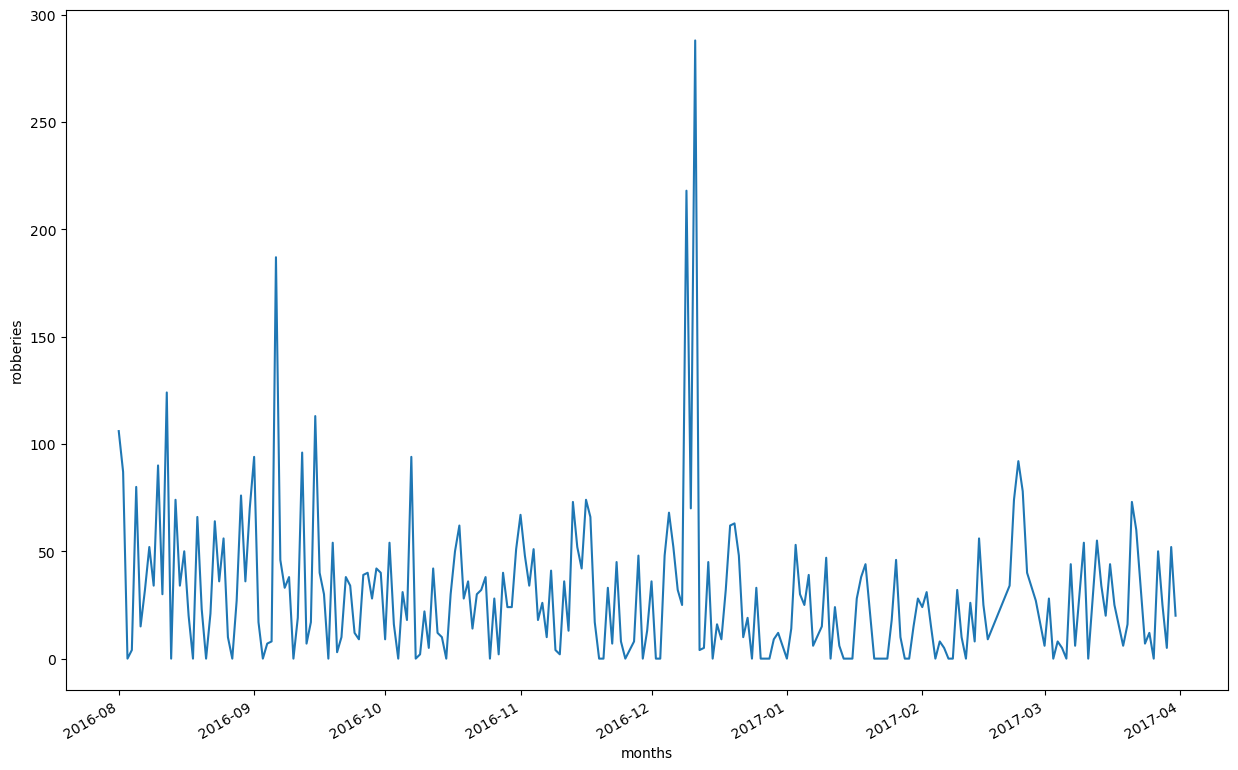

In [19]:
# Data Analysis (line plot)
plt.figure(figsize=(15,10))
train.plot()
plt.ylabel('robberies')
plt.xlabel('months')
plt.show()

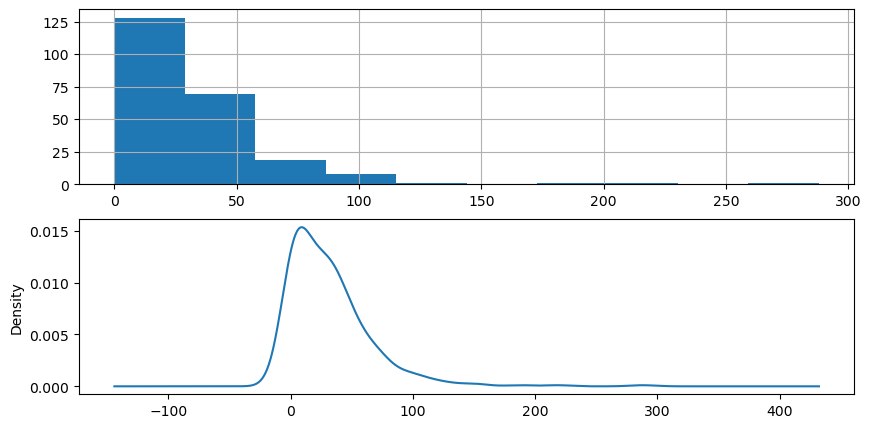

In [20]:
#density plot
plt.figure(figsize=(10,5))
plt.subplot(211)
train.hist()
plt.subplot(212)
series.plot(kind='kde')
plt.show()

In [21]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

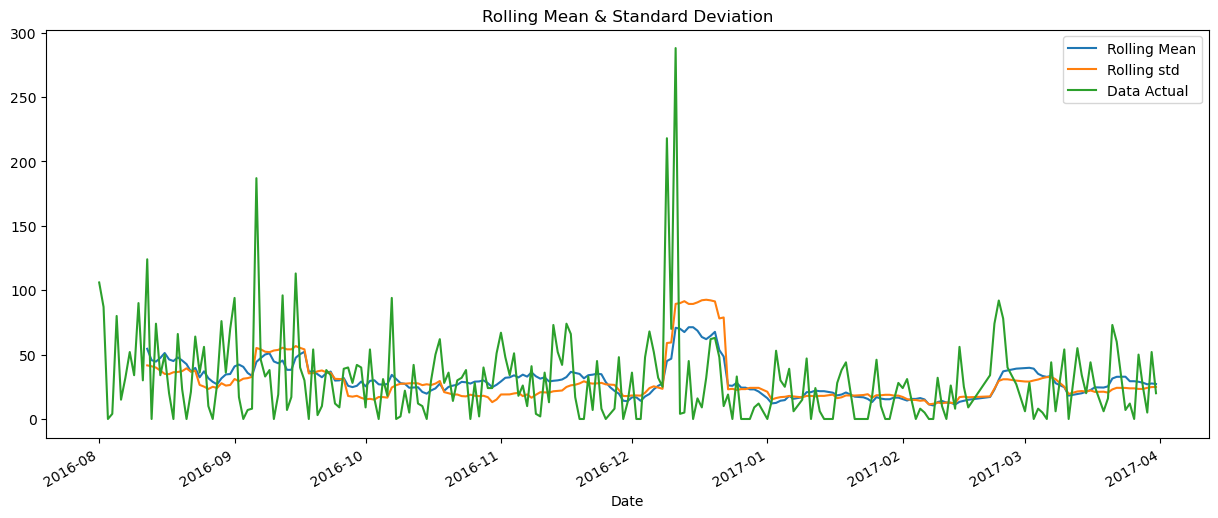

####################################################################################################
ADF Statistic: -8.609425
p-value: 0.000000
Critical Values:
	1%: -3.460
	5%: -2.874
	10%: -2.574
ADF < Critival Values
Reject null hypothesis, time series is stationary


In [22]:
def adfuller_test(y):
    # Plotting rolling statistics
    fig, ax = plt.subplots(figsize=(15, 6))
    y.rolling(12).mean().plot(ax=ax, label='Rolling Mean')
    y.rolling(12).std().plot(ax=ax, label='Rolling std')
    y.plot(ax=ax, label='Data Actual')
    plt.xlabel('Date')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show();
    
    print('#'*100)
    # Aduller test
    result = adfuller(y)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[0] > result[4]['5%']:
        print('ADF > Critical Values')
        print('Failed to reject null hypothesis, time series is non-stationary')
    else:
        print('ADF < Critival Values')
        print('Reject null hypothesis, time series is stationary')

adfuller_test(train)

In [23]:
import time
from sklearn.metrics import mean_absolute_error

p_params = range(0, 25, 8)
q_params = range(0, 3)

mae_grid = dict()
for p in p_params:
    mae_grid[p] = list()
    for q in q_params:
        order = (p, 0, q)
        start_time = time.time()
        model = ARIMA(train, order=order).fit()
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
        y_pred = model.predict()
        mae = mean_absolute_error(train.iloc[24:], y_pred.iloc[24:])
        mae_grid[p].append(mae)

print()
print(mae_grid)

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.


Trained ARIMA (0, 0, 0) in 0.06 seconds.
Trained ARIMA (0, 0, 1) in 0.08 seconds.
Trained ARIMA (0, 0, 2) in 0.15 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (8, 0, 0) in 0.25 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (8, 0, 1) in 0.53 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed t

Trained ARIMA (8, 0, 2) in 1.05 seconds.
Trained ARIMA (16, 0, 0) in 0.8 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (16, 0, 1) in 1.17 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed t

Trained ARIMA (16, 0, 2) in 3.63 seconds.
Trained ARIMA (24, 0, 0) in 8.23 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (24, 0, 1) in 12.8 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed t

Trained ARIMA (24, 0, 2) in 21.49 seconds.

{0: [22.964008037450906, 22.578090268674785, 22.972923979342532], 8: [22.80563086900767, 22.813918398480755, 22.372709762411443], 16: [22.3805367615826, 22.37831445340638, 22.203992970362638], 24: [22.74928143887536, 22.654178480819645, 22.06215606629688]}


In [24]:
mae_df = pd.DataFrame(mae_grid)
mae_df.round(4)

,0,8,16,24
0,22.9640,22.8056,22.3805,22.7493
1,22.5781,22.8139,22.3783,22.6542
2,22.9729,22.3727,22.2040,22.0622


In [25]:
idx_min = mae_df.idxmin()
min_value = mae_df.min().min()
for c, r in zip(idx_min.index, idx_min.values):
    if mae_df.loc[r, c] == min_value:
        print(c, r)
        p_opt = c
        q_opt = r
 

24 2


In [26]:
model = ARIMA(train, order=(p_opt, 0, q_opt)).fit()
print(model.summary())

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed t

                               SARIMAX Results                                
Dep. Variable:     total_transactions   No. Observations:                  228
Model:                ARIMA(24, 0, 2)   Log Likelihood               -1115.466
Date:                Wed, 22 May 2024   AIC                           2286.933
Time:                        16:52:47   BIC                           2382.954
Sample:                             0   HQIC                          2325.674
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.8002      5.051      6.097      0.000      20.900      40.701
ar.L1          0.9699      0.107      9.066      0.000       0.760       1.180
ar.L2         -0.7700      0.114     -6.755      0.0

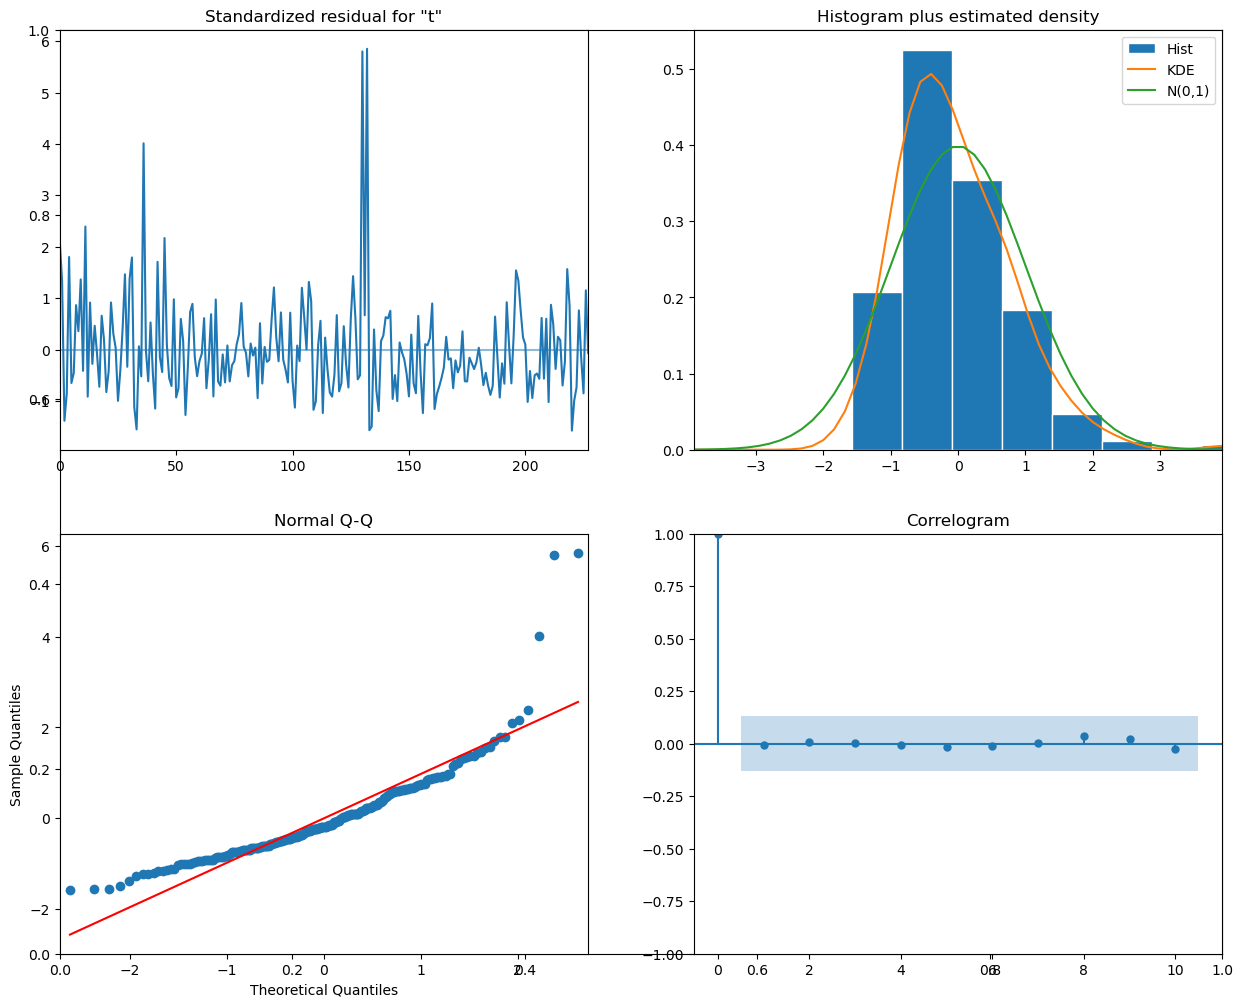

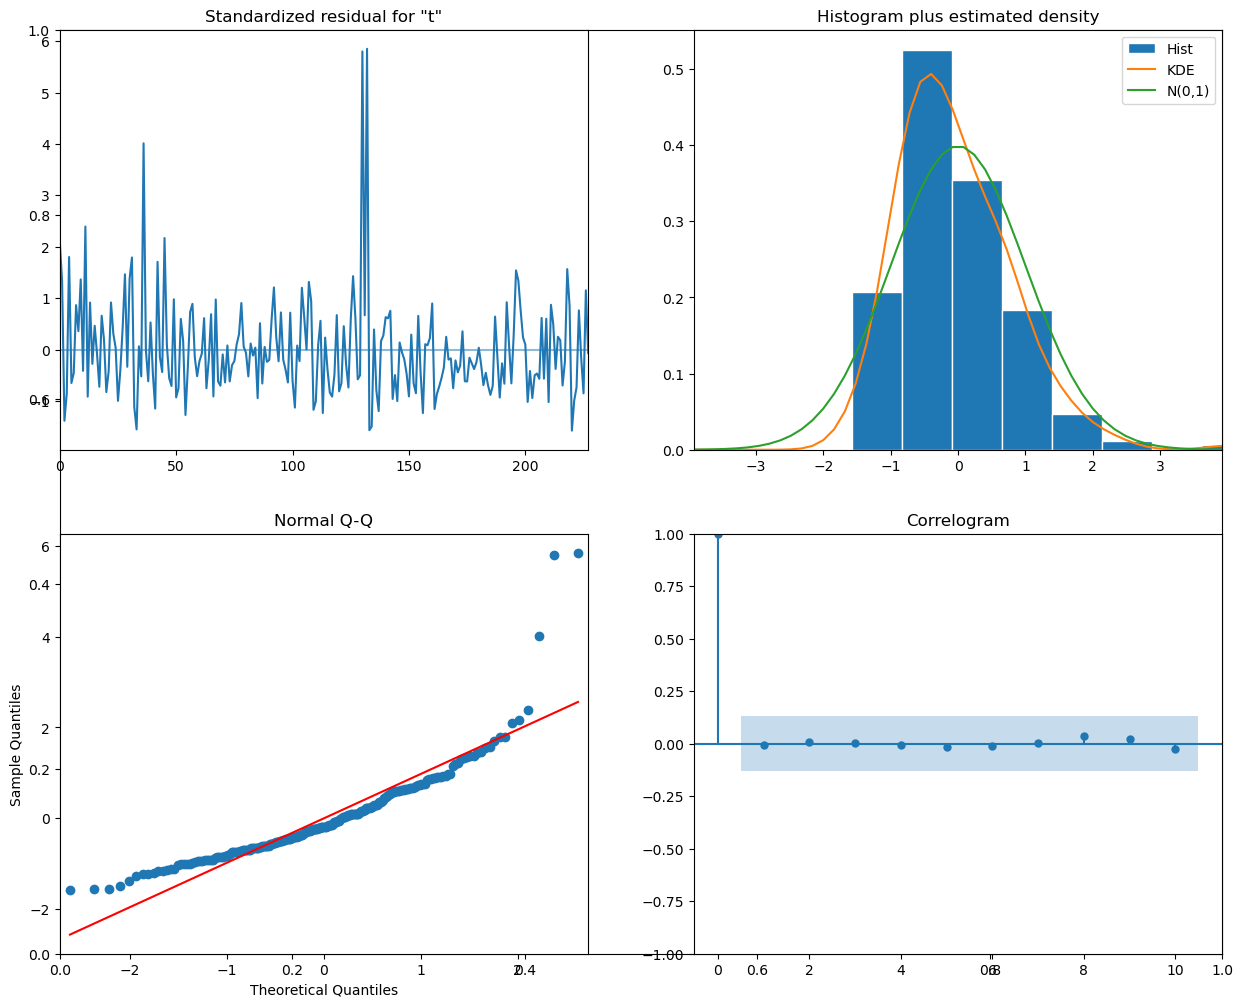

In [27]:
fig, ax = plt.subplots(figsize=(15, 12))
model.plot_diagnostics(fig=fig)

In [37]:
y_pred_wfv = pd.Series()
history = train.copy()
for i in range(len(test)):
    model = ARIMA(history, order=(p_opt, 0, q_opt)).fit()
    next_pred = model.forecast()
    next_period = test.index[i]
    pred_data = pd.Series(next_pred.iloc[0], index=[next_period])
    y_pred_wfv = pd.concat([y_pred_wfv, pred_data])
    tested_data = pd.Series([test[next_period]], index=[next_period])
    history = pd.concat([history, tested_data])

C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_3280\3215420438.py:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: Con

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

In [38]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

df_pred_test = pd.DataFrame({'y_test': test, 'y_pred_wfv': y_pred_wfv})
fig = px.line(df_pred_test, labels={'value': 'Total Visits'})
fig.show()

In [51]:
print(mean_absolute_error(test.resample('M').mean(), y_pred_wfv.resample('M').mean()))
df_pred_test

6.422479142044104


,y_test,y_pred_wfv
2017-04-02,0.0,50.846568
2017-04-03,153.0,33.117997
2017-04-04,22.0,3.669074
2017-04-05,28.0,47.727047
2017-04-06,42.0,55.446658
...,...,...
2017-07-28,50.0,26.902568
2017-07-29,20.0,29.924554
2017-07-30,31.0,29.441041
2017-07-31,60.0,20.927363


In [40]:
df_pred_test.resample('W').mean()

,y_test,y_pred_wfv
2017-04-02,0.000000,50.846568
2017-04-09,41.857143,31.869050
2017-04-16,26.000000,31.287309
2017-04-23,37.428571,27.529386
2017-04-30,39.571429,33.525216
2017-05-07,16.142857,27.608332
2017-05-14,24.857143,30.429265
2017-05-21,46.428571,34.505268
2017-05-28,36.714286,34.203257
2017-06-04,36.166667,30.175380


In [52]:
# Baseline
y_mean = test.mean()
y_baseline = y_mean + test * 0
print('y_mean ', y_mean)
print(mean_absolute_error(test.resample('M').mean(), y_baseline.resample('M').mean()))

y_mean  34.59166666666667
6.6147701149425275


In [42]:
pd.DataFrame({'actual': series, 'y_pred_wfv': y_pred_wfv}).tail()

,actual,y_pred_wfv
2017-07-28,50.0,26.902568
2017-07-29,20.0,29.924554
2017-07-30,31.0,29.441041
2017-07-31,60.0,20.927363
2017-08-01,54.0,35.565258


In [55]:
result = pd.DataFrame({'actual': series, 'y_pred_wfv': y_pred_wfv})
result

,actual,y_pred_wfv
2016-08-01,106.0,NaN
2016-08-02,87.0,NaN
2016-08-03,0.0,NaN
2016-08-04,4.0,NaN
2016-08-05,80.0,NaN
...,...,...
2017-07-28,50.0,26.902568
2017-07-29,20.0,29.924554
2017-07-30,31.0,29.441041
2017-07-31,60.0,20.927363


In [56]:
result = result.reset_index(names=['date'])
result['product'] = tuple(anomaly)[idx_prod] * result.shape[0]
result.to_csv(f'../result/transaction-regression-{tuple(anomaly)[idx_prod]}.csv', index=False)